In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df['Partner'] = np.where(df['Partner'] == 'Yes', 1, 0)
df['Dependents'] = np.where(df['Dependents'] == 'Yes', 1, 0)
df['PhoneService'] = np.where(df['PhoneService'] == 'Yes', 1, 0)
df['PaperlessBilling'] = np.where(df['PaperlessBilling'] == 'Yes', 1, 0)
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df["InternetService"] = df["InternetService"].replace(["No", "DSL", "Fiber optic"], [0, 1, 2])
df['OnlineBackup'] = np.where(df['OnlineBackup'] == 'Yes', 1, 0)
df['OnlineSecurity'] = np.where(df['OnlineSecurity'] == 'Yes', 1, 0)
df['DeviceProtection'] = np.where(df['DeviceProtection'] == 'Yes', 1, 0)
df['TechSupport'] = np.where(df['TechSupport'] == 'Yes', 1, 0)
df['StreamingMovies'] = np.where(df['StreamingMovies'] == 'Yes', 1, 0)
df['StreamingTV'] = np.where(df['StreamingTV'] == 'Yes', 1, 0)
df["Contract"] = df["Contract"].replace(["Month-to-month", "One year", "Two year"], [0, 1, 2])
df["PaymentMethod"] = df["PaymentMethod"].replace(["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"], [0, 1, 2, 3])


In [8]:
df['MultipleLines'] = np.where(df['MultipleLines'] == 'Yes', 1, 0)
df_test = df.drop(['customerID'], axis=1)
df_test.drop(['InternetService'], axis=1, inplace=True)
df_test.loc[df_test['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
df_test.dropna(inplace=True)
df = df.drop(['customerID'], axis=1)


In [9]:
X = df.drop(['TotalCharges'], axis=1)
y = df['TotalCharges']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [11]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy: 0.009226401703335699
Classification Report: 
               precision    recall  f1-score   support

                   1.00      1.00      1.00         1
       100.2       0.00      0.00      0.00         0
       100.4       0.00      0.00      0.00         1
       100.8       0.00      0.00      0.00         1
       100.9       0.00      0.00      0.00         0
      1001.2       0.00      0.00      0.00         0
      1001.5       0.00      0.00      0.00         1
     1003.05       0.00      0.00      0.00         1
     1008.55       0.00      0.00      0.00         1
      1008.7       0.00      0.00      0.00         1
       101.1       0.00      0.00      0.00         0
      101.65       0.00      0.00      0.00         0
     1011.05       0.00      0.00      0.00         1
      1012.4       0.00      0.00      0.00         1
     1013.05       0.00      0.00      0.00         0
      1013.2       0.00      0.00      0.00         0
     1017.35       0.00  

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Rec

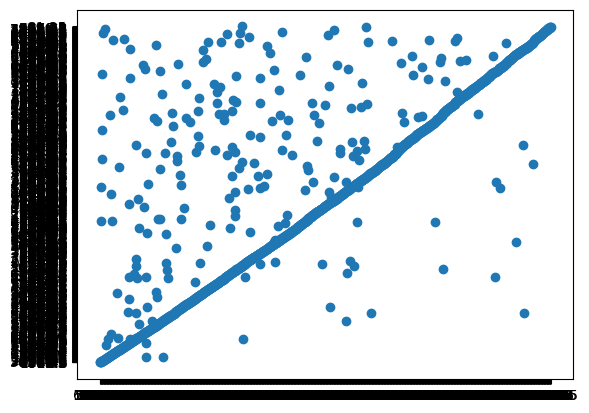

In [14]:
pred = model.predict(X_test)
plt.scatter(pred, y_test)